In [2]:
import pandas as pd
import geopandas as gpd
import folium

import warnings
warnings.filterwarnings('ignore')

In [3]:
life_expectancy = pd.read_csv('data/life-expectancy-vs-healthcare-expenditure.csv')
life_expectancy.head()

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"Health expenditure per capita, PPP (constant 2011 international $)","Life expectancy at birth, total (years)"
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN


In [15]:
# Data Clean up

# 1. Rename Columns!
life_expectancy.rename(columns={'Total population (Gapminder, HYDE & UN)': 'Population',
                                'Health expenditure per capita, PPP (constant 2011 international $)': 'expenditure',
                                'Life expectancy at birth, total (years)': 'expectancy'}, inplace=True)

# 2. No null values in expenditure or expectancy
life_expectancy = life_expectancy[(life_expectancy['expenditure'].notna()) & (life_expectancy['expectancy'].notna())
                                 & (life_expectancy['Population'].notna())]

# 3. No Nan values in Code. Remove those
life_expectancy = life_expectancy[life_expectancy['Code'].notna()]
life_expectancy.head()

,Entity,Code,Year,Population,Continent,expenditure,expectancy,total_expenditure
203,Afghanistan,AFG,2002,22601000.0,NaN,75.983514,56.637,1.717303
204,Afghanistan,AFG,2003,23681000.0,NaN,89.440178,57.250,2.118033
205,Afghanistan,AFG,2004,24727000.0,NaN,87.520903,57.875,2.164129
206,Afghanistan,AFG,2005,25654000.0,NaN,88.323062,58.500,2.265840
207,Afghanistan,AFG,2006,26433000.0,NaN,86.856016,59.110,2.295865


In [16]:
# Calculate total expenditure
life_expectancy['total_expenditure'] = life_expectancy['Population'] * life_expectancy['expenditure'] / 1e9  # In Billion $
life_expectancy.head()

,Entity,Code,Year,Population,Continent,expenditure,expectancy,total_expenditure
203,Afghanistan,AFG,2002,22601000.0,NaN,75.983514,56.637,1.717303
204,Afghanistan,AFG,2003,23681000.0,NaN,89.440178,57.250,2.118033
205,Afghanistan,AFG,2004,24727000.0,NaN,87.520903,57.875,2.164129
206,Afghanistan,AFG,2005,25654000.0,NaN,88.323062,58.500,2.265840
207,Afghanistan,AFG,2006,26433000.0,NaN,86.856016,59.110,2.295865


In [17]:
# Find year common to all countries
life_expectancy.Year.value_counts()

2012    182
2013    181
2005    181
2002    181
2014    181
2003    180
2011    180
2007    180
2010    180
2008    180
2006    180
2004    180
2009    180
2000    180
2001    178
1997    177
1999    176
1995    175
1998    175
1996    174
Name: Year, dtype: int64

### TASK 1 : Plot expenditure vs expectancy in year 2012

In [18]:
plot_data = life_expectancy[life_expectancy['Year'] == 2012]

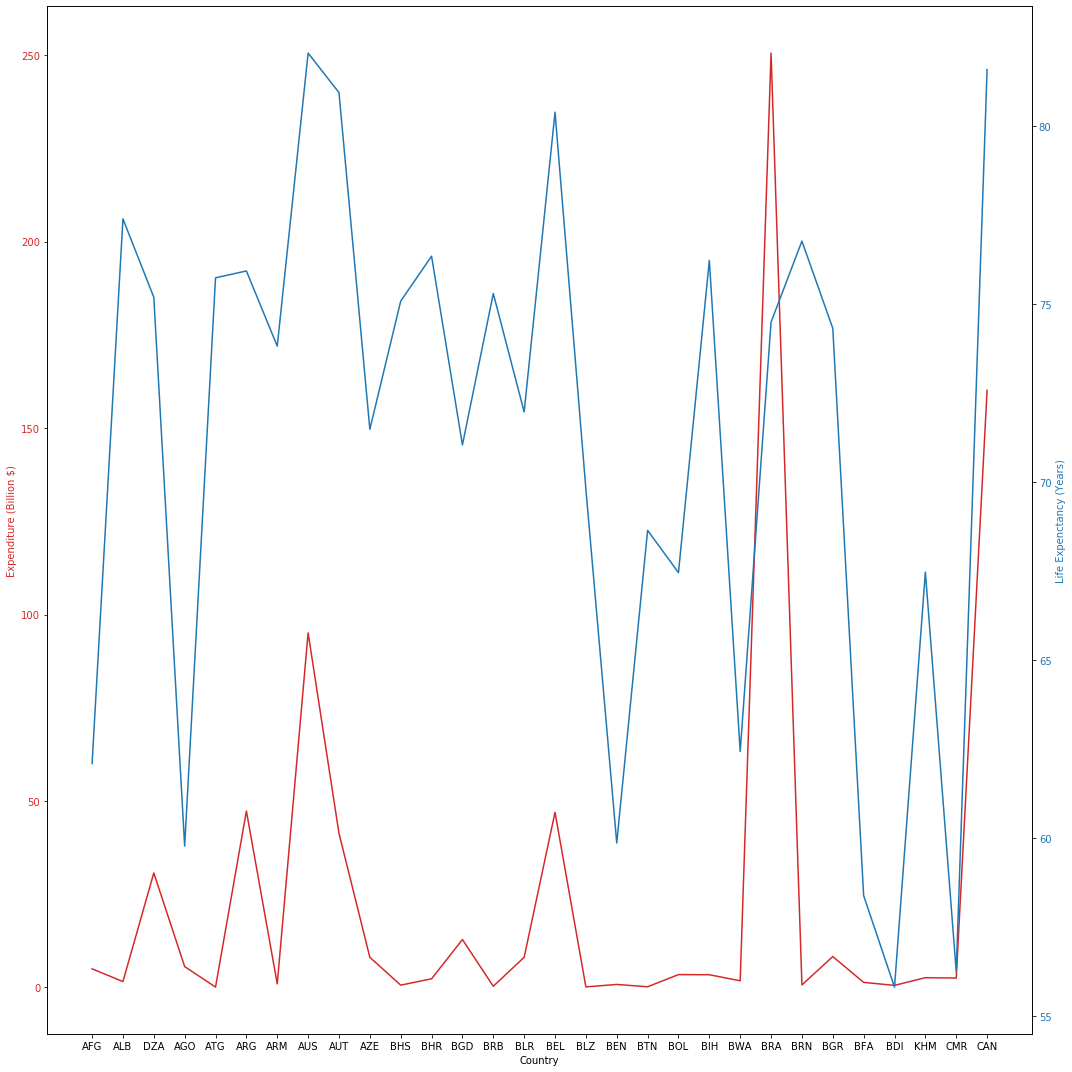

In [22]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15, 15))
color = 'tab:red'
ax1.set_xlabel('Country')
ax1.set_ylabel('Expenditure (Billion $)', color=color)
ax1.plot(plot_data['Code'][0:30], plot_data['total_expenditure'][0:30], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Life Expenctancy (Years)', color=color)  # we already handled the x-label with ax1
ax2.plot(plot_data['Code'][0:30], plot_data['expectancy'][0:30], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig('health_expenditure-vs-Life-Expectancy.png')

In [14]:
plot_data[plot_data['Code'].isna()]

,Entity,Code,Year,Population,Continent,expenditure,expectancy,total_expenditure
32177,North America,NaN,2012,349092992.0,NaN,8370.831921,79.025152,2922.198761


In [21]:
plot_data.head()

,Entity,Code,Year,Population,Continent,expenditure,expectancy,total_expenditure
213,Afghanistan,AFG,2012,31161000.0,NaN,160.368027,62.086,4.997228
556,Albania,ALB,2012,2914000.0,NaN,544.006172,77.389,1.585234
776,Algeria,DZA,2012,37384000.0,NaN,821.338885,75.187,30.704933
1286,Angola,AGO,2012,25108000.0,NaN,223.244529,59.770,5.605224
1577,Antigua and Barbuda,ATG,2012,90000.0,NaN,1128.176372,75.733,0.101536


#### As we see in the plot, there is a clear correlation between the life expectancy and health expenditure. Where ever we see a peak in the health expenditure, a peak in the life expectancy follows. There are exceptions though. For Eg: BGD (Bangladesh) spends more than Barbados (BRB), but the life expectancy is lesser. Similarly, Brunei spends very less on its healthcare, but still has a high life expectancy.

In [27]:
# Now Lets see if we can make a more meaningful plot
plot_data.sort_values(by=['expenditure'], ascending=False, inplace=True)
plot_data.head()

,Entity,Code,Year,Population,Continent,expenditure,expectancy,total_expenditure
47120,United States,USA,2012,314044000.0,NaN,8789.767513,78.741463,2760.373749
25462,Luxembourg,LUX,2012,531000.0,NaN,6541.348173,81.392683,3.473456
42958,Switzerland,CHE,2012,8008000.0,NaN,6173.036453,82.697561,49.433676
32688,Norway,NOR,2012,5014000.0,NaN,6116.478880,81.451220,30.668025
31033,Netherlands,NLD,2012,16792000.0,NaN,5115.013393,81.104878,85.891305


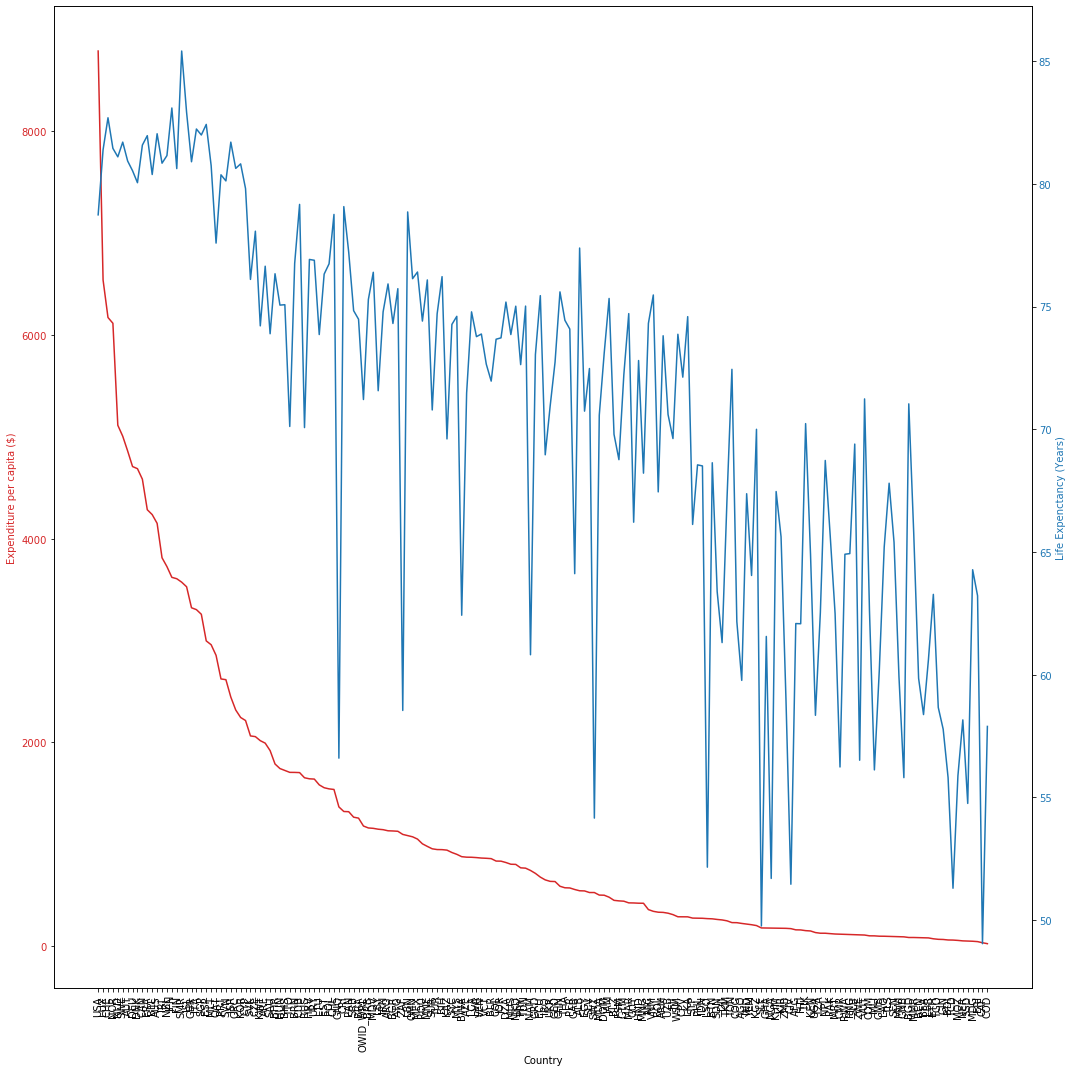

In [31]:
fig, ax1 = plt.subplots(figsize=(15, 15))
color = 'tab:red'
plt.xticks(rotation=90)
ax1.set_xlabel('Country')
ax1.set_ylabel('Expenditure per capita ($)', color=color)
ax1.plot(plot_data['Code'], plot_data['expenditure'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Life Expenctancy (Years)', color=color)  # we already handled the x-label with ax1
ax2.plot(plot_data['Code'], plot_data['expectancy'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig.savefig('expenditure-per-capita-vs-Life-Expectancy.png')

### TASK 2: Find values for entire continents

In [32]:
worldfilepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(worldfilepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [43]:
# Now merge this dataframe with the one we have

# First rename the column 'Code' to 'iso_a3'
plot_data.rename(columns={'Code': 'iso_a3'}, inplace=True)

# Now Merge
merged_data = plot_data.merge(world, on='iso_a3')
merged_data.head()

,Entity,iso_a3,Year,Population,Continent,expenditure,expectancy,total_expenditure,pop_est,continent,name,gdp_md_est,geometry
0,United States,USA,2012,314044000.0,NaN,8789.767513,78.741463,2760.373749,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1,Luxembourg,LUX,2012,531000.0,NaN,6541.348173,81.392683,3.473456,594130,Europe,Luxembourg,58740.0,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ..."
2,Switzerland,CHE,2012,8008000.0,NaN,6173.036453,82.697561,49.433676,8236303,Europe,Switzerland,496300.0,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ..."
3,Netherlands,NLD,2012,16792000.0,NaN,5115.013393,81.104878,85.891305,17084719,Europe,Netherlands,870800.0,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ..."
4,Sweden,SWE,2012,9543000.0,NaN,5007.480762,81.704878,47.786389,9960487,Europe,Sweden,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."


In [44]:
# Keep relevant columns
merged_data = merged_data[["Entity", "iso_a3", "Population", "expenditure", "total_expenditure", "expectancy", "continent", "gdp_md_est", "geometry"]]
merged_data.head()

,Entity,iso_a3,Population,expenditure,total_expenditure,expectancy,continent,gdp_md_est,geometry
0,United States,USA,314044000.0,8789.767513,2760.373749,78.741463,North America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1,Luxembourg,LUX,531000.0,6541.348173,3.473456,81.392683,Europe,58740.0,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ..."
2,Switzerland,CHE,8008000.0,6173.036453,49.433676,82.697561,Europe,496300.0,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ..."
3,Netherlands,NLD,16792000.0,5115.013393,85.891305,81.104878,Europe,870800.0,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ..."
4,Sweden,SWE,9543000.0,5007.480762,47.786389,81.704878,Europe,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."


In [45]:
# Check if there are null values for continent
merged_data.continent.value_counts()

Africa           48
Asia             42
Europe           36
North America    16
South America    12
Oceania           6
Name: continent, dtype: int64

In [47]:
# Now groupby continents and find the mean
continent_data = merged_data.groupby('continent').mean()
continent_data.head()

,Population,expenditure,total_expenditure,expectancy,gdp_md_est
continent,,,,,
Africa,2.244373e+07,275.772333,5.740888,60.176646,1.251546e+05
Asia,1.003086e+08,851.951843,53.955739,72.173260,1.290298e+06
Europe,1.860300e+07,2579.574653,49.487595,77.739869,6.167413e+05
North America,3.419750e+07,1596.642623,193.816072,74.345748,1.460748e+06
Oceania,6.112333e+06,1420.947586,18.830034,73.067573,2.336858e+05
